# GEOG5995M Portfolio assignment

Student ID number: 201793746



## Block One Submission

What is the relationship between the fare passengers paid to travel on the Titanic and whether or not they survived? 

Is this relationship different for males and females? 

In [1]:
# import required packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# hide formatting warning for .catplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the titanic dataset and save it as a dataframe named titanic
titanic = sns.load_dataset('titanic')

# check the data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# check data types and for any missing values, particularly for 'fare', 'sex' and 'survived'
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


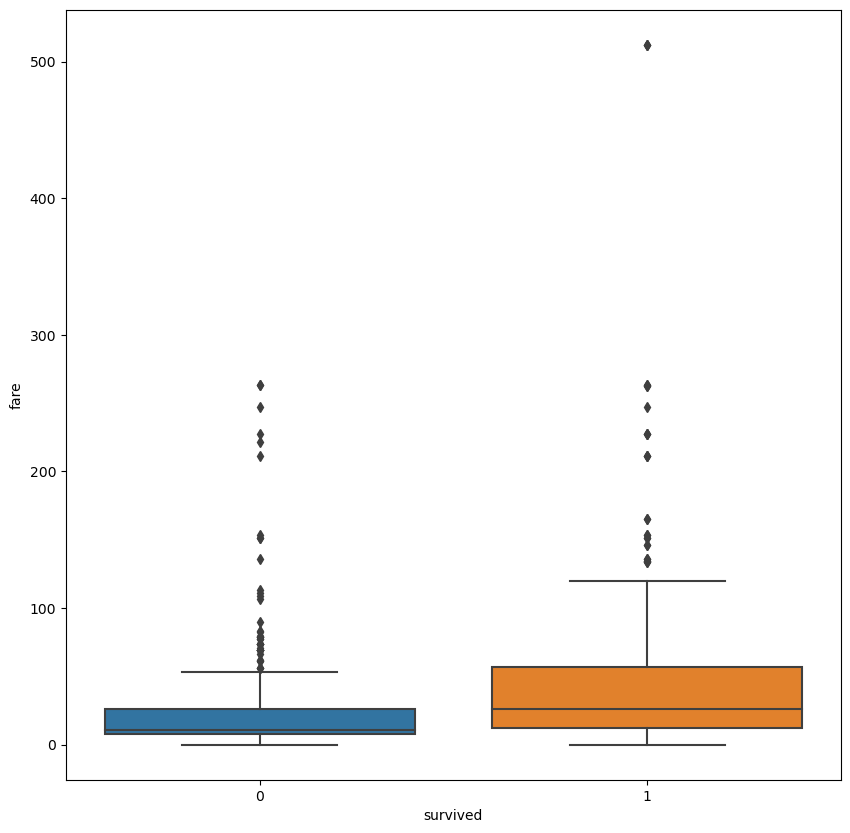

In [4]:
# identify potential outliers
plt.figure(figsize=(10, 10))
sns.boxplot(x='survived', y='fare', data=titanic);

In [5]:
# view more detail for potential outlier 'fare' records 
titanic.loc[titanic['fare'] > 450]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


I could see that the attributes these three records had in common were that they were first class passengers embarking from Cherbourg. It is possible that there was a much higher fare charged for passengers from this port, but to check I looked at the other fares paid by passengers with these attributes to see if these were also very high. 

In [6]:
# check other first class passengers embarking from Cherbourg 'fare' values.
titanic.loc[(titanic['embark_town'] == 'Cherbourg') & (titanic['class'] == 'First'), 'fare']

1       71.2833
30      27.7208
31     146.5208
34      82.1708
52      76.7292
         ...   
839     29.7000
842     31.0000
849     89.1042
879     83.1583
889     30.0000
Name: fare, Length: 85, dtype: float64

In [7]:
# remove records with outlier 'fare' values
titanic.drop(titanic[titanic['fare'] > 500].index, inplace=True)

# check records have been removed
titanic.nlargest(10, 'fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
380,1,1,female,42.0,0,0,227.5250,C,First,woman,False,NaN,Cherbourg,yes,True
557,0,1,male,NaN,0,0,227.5250,C,First,man,True,NaN,Cherbourg,no,True


In [8]:
# Convert 'survived' dtype to boolean so that it displays as True/False in the visualisation legend
titanic['survived'] = titanic['survived'].astype(bool)

# Check change
titanic.survived.dtype

dtype('bool')

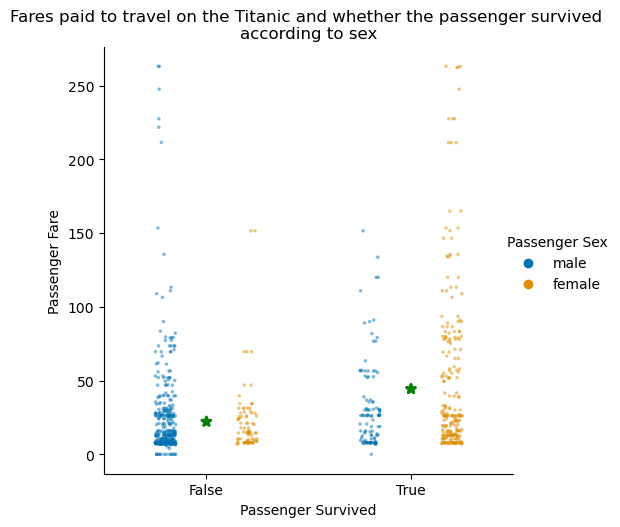

In [9]:
# Data visualisation 
g = sns.catplot(x='survived', y='fare', hue='sex', dodge=True, data=titanic, marker=".", alpha=0.5, 
                palette='colorblind');
ax = g.ax

sns.pointplot(data=titanic, x="survived", y="fare", estimator=np.mean, join=False, errorbar=None, markers=['*'], 
              color='green', ax=ax);
# Labelling
ax.set_title('Fares paid to travel on the Titanic and whether the passenger survived \naccording to sex')
ax.set_xlabel('Passenger Survived')
ax.set_ylabel('Passenger Fare');
g._legend.set_title('Passenger Sex')

### Block One Submission

#### Overview
This visualisation compares the fares paid by passengers and shows that those who survived did on average pay a higher fare. The marker I have chosen is smaller than the default, resulting in less overlap and clearer presentation of density. Increasing the transparency of the data markers also improves the visibility of the data density. I have chosen the colour palette <code>colorblind</code> to make the visualisation more accessible to anyone with colour blindness.  

#### Additional categorical variable
I have also included 'sex' as an additional categorical variable. I have seperated the data markers for each sex using <code>Dodge=True</code> to make it easier to see that there seems to be a different relationship between survival and fare for males and females, i.e. of the passengers who survived, all those who paid the highest fares (over 200) were female, whereas of those who didn't survive, the passengers paying the highest fares were male. 

#### PointPlot to represent the mean
I have included a <code>.pointplot</code> to indicate the mean fare for each survival category, to make it easier to see that the average fare is higher overall for passangers who survived. I chose are marker that was distinctive so that it would stand out from the rest of the markers displayed. I chose to colour it green to represent an average measure across the blue and yellow data points for each category.





    

## Block Two Submission: 
 
Plot the level of obesity by USA state. 

In [12]:
# import additional packages
import geopandas as gpd
import geoplot as gplt

In [13]:
# setting up the USA dataframe
usa_path = gplt.datasets.get_path('contiguous_usa')
usa = gpd.read_file(usa_path)

# check the data
usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [14]:
# setting up USA cities dataframe
cities_path = gplt.datasets.get_path('usa_cities')
cities = gpd.read_file(cities_path)

# check the data
cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


In [15]:
# joining state and city dataframes to get state initials column
usa_cities = gpd.sjoin(usa, cities, how='left', op='contains')
usa_cities.head()

,state,adm1_code,population,geometry,index_right,id,POP_2010,ELEV_IN_FT,STATE
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",1269,7747,13138.0,1181.0,MN
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",1524,10036,12764.0,1594.0,MN
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",1296,7950,10666.0,1184.0,MN
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",1169,6824,18016.0,1247.0,MN
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",1170,6830,24718.0,1204.0,MN


In [16]:
# remove unwanted columns
usa = usa_cities.drop(columns=['index_right', 'id', 'POP_2010', 'ELEV_IN_FT'])
usa.head()

,state,adm1_code,population,geometry,STATE
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN


In [17]:
# remove duplicate rows
usa = usa.drop_duplicates(subset='state', keep="first")
usa.head()

,state,adm1_code,population,geometry,STATE
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",MT
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",ND
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",ID
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",WA


In [18]:
usa_centroid = usa.copy()
usa_centroid['geometry'] = usa.centroid
usa_centroid.head()

,state,adm1_code,population,geometry,STATE
0,Minnesota,USA-3514,5303925,POINT (-94.17744 46.36007),MN
1,Montana,USA-3515,989415,POINT (-109.65900 47.04846),MT
2,North Dakota,USA-3516,672591,POINT (-100.48470 47.46271),ND
3,Idaho,USA-3518,1567582,POINT (-114.65497 44.39401),ID
4,Washington,USA-3519,6724540,POINT (-120.39837 47.37975),WA


In [19]:
# setting up the obesity dataframe
obesity_path = gplt.datasets.get_path('obesity_by_state')
obesity = gpd.read_file(obesity_path)

# check the data
obesity.head()

,State,Percent,geometry
0,Alabama,32.4,None
1,Missouri,30.4,None
2,Alaska,28.4,None
3,Montana,24.6,None
4,Arizona,26.8,None


In [20]:
# remove empty geometry column to avoid multiple geometry columns after merge
obesity = obesity.drop(columns = ['geometry'])
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


In [21]:
# joining spatial and non spatial data
usa_obesity = pd.merge(usa, obesity, left_on='state', right_on='State', how='left')
usa_obesity.head()

,state,adm1_code,population,geometry,STATE,State,Percent
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN,Minnesota,25.5
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",MT,Montana,24.6
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",ND,North Dakota,31.0
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",ID,Idaho,29.6
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",WA,Washington,27.2


In [22]:
# check data types
usa_obesity.dtypes

state           object
adm1_code       object
population       int64
geometry      geometry
STATE           object
State           object
Percent         object
dtype: object

In [23]:
# convert 'Percent' to a number
usa_obesity['Percent'] = pd.to_numeric(usa_obesity['Percent'])
usa_obesity.dtypes

state           object
adm1_code       object
population       int64
geometry      geometry
STATE           object
State           object
Percent        float64
dtype: object

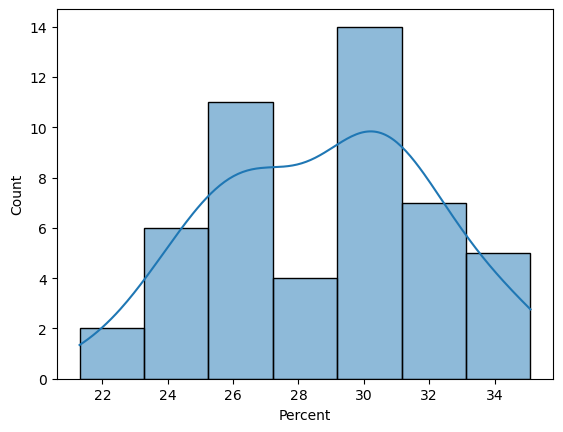

In [24]:
# explore the distribution of obesity data to inform the class scheme selection in the final plot
sns.histplot(usa_obesity['Percent'], kde=True );

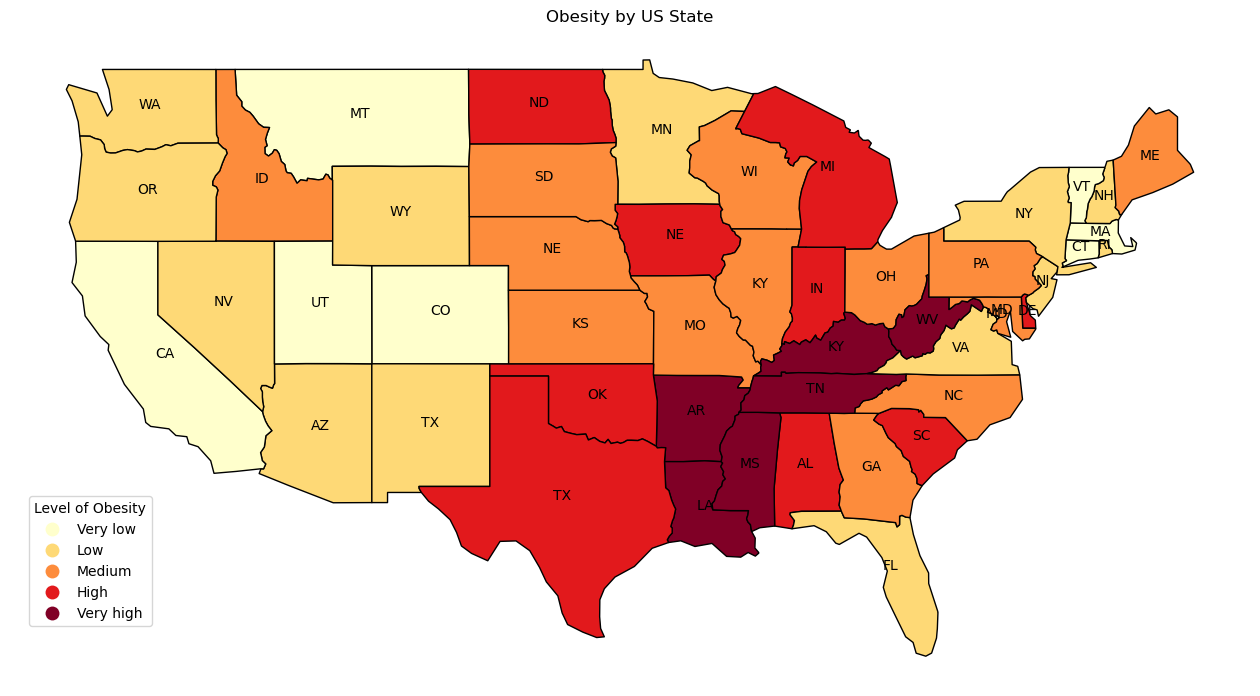

In [25]:
# create a plot
f, ax = plt.subplots(1, figsize=(16, 16))

# plot data 
usa_obesity.plot(column='Percent', legend=True, ax=ax, cmap='YlOrRd', scheme='natural_breaks', edgecolor='k')

# add state labels
usa_centroid.apply(lambda x: ax.annotate(text=x['STATE'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# add map title
ax.set_title('Obesity by US State')

# position legend
ax.get_legend().set_bbox_to_anchor((.12, .3))

# set legend title
leg = ax.get_legend()
leg.set_title("Level of Obesity")
leg.get_texts()[0].set_text('Very low')
leg.get_texts()[1].set_text('Low')
leg.get_texts()[2].set_text('Medium')
leg.get_texts()[3].set_text('High')
leg.get_texts()[4].set_text('Very high')

# remove axis
ax.set_axis_off()


plt.show();


### Block Two Submission


#### Overview
This visualisation shows the percentage of obesity across the United States of America (USA). I have chosen to plot a choropleth map of this data to give an accessible, at-a-glance view of how the percentage of obesity varies across the USA. 

#### Style choices
I have chosen to use the color map <code>YlOrRd</code>, which is a sequential color map, to show the increasing severity of risk associated with higher levels of obesity. If a person interpreting this visulistion has colour blindness they may still be able to see the variation in lightness/darkness corresponding to the changing severity. 

I have chosen to use the scheme <code>natural_breaks</code> to minimize within-class variance and maximize between-class differences. One potential downside of this scheme is that it generates unique classification ranges for each data set, however, as I don't need to compare this visualisation to another, this downside is not applicable in this case. Another option would have been to use <code>equal_interval</code> however this wouldn't have been as appropriate as the data is slightly skewed towards the higher values, as seen in the histogram. 

I have added black outlines to the states to make it easier to see the separation between adjacent states that are the same color. 


#### Labelling
I wanted to label the visualisation to make it more accessible to audiences who don't know the states by sight, however the full names made the map difficult to read as several labels overlapped. To deal with this, I have used the dataframe <code>usa_cities</code> to pull in the state initials, which take up less space, and so are easier to read.  

I have titled the legend <code>Level of Obesity</code> and changed the legend labels to make them easier to interpret. 

